In [18]:
import pandas as pd


timestamp = '20231116_145035'
timestamp = '20231116_151751'

# Directory path
directory_path = f'/home/insectvr/src/build/20231116_StripeFixation_Data/RunData/{timestamp}/'

# Full paths for each file
file_path1 = directory_path + f'{timestamp}_ChoiceAssay_VR1_.csv'
file_path2 = directory_path + f'{timestamp}_ChoiceAssay_VR2_.csv'
file_path3 = directory_path + f'{timestamp}_ChoiceAssay_VR3_.csv'
file_path4 = directory_path + f'{timestamp}_ChoiceAssay_VR4_.csv'

# Load the files into DataFrames
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)
df4 = pd.read_csv(file_path4)

# Display the first few rows of each DataFrame to confirm
print("DataFrame 1:")
print(df1.head())
print("\nDataFrame 2:")
print(df2.head())
print("\nDataFrame 3:")
print(df3.head())
print("\nDataFrame 4:")
print(df4.head())

DataFrame 1:
              Current Time   VR        Scene  CurrentStep  GameObjectPosX  \
0  2023-11-16 15:18:32.804  VR1  ChoiceAssay            0             0.0   
1  2023-11-16 15:18:32.821  VR1  ChoiceAssay            0             0.0   
2  2023-11-16 15:18:32.837  VR1  ChoiceAssay            0             0.0   
3  2023-11-16 15:18:32.854  VR1  ChoiceAssay            0             0.0   
4  2023-11-16 15:18:32.870  VR1  ChoiceAssay            0             0.0   

   GameObjectPosY  GameObjectPosZ  GameObjectRotX  GameObjectRotY  \
0               0             0.0               0          0.0000   
1               0             0.0               0          0.0000   
2               0             0.0               0          0.0000   
3               0             0.0               0        308.0909   
4               0             0.0               0          0.0000   

   GameObjectRotZ  SensPosX  SensPosY  SensPosZ  SensRotX  SensRotY  SensRotZ  
0               0  0.000000  

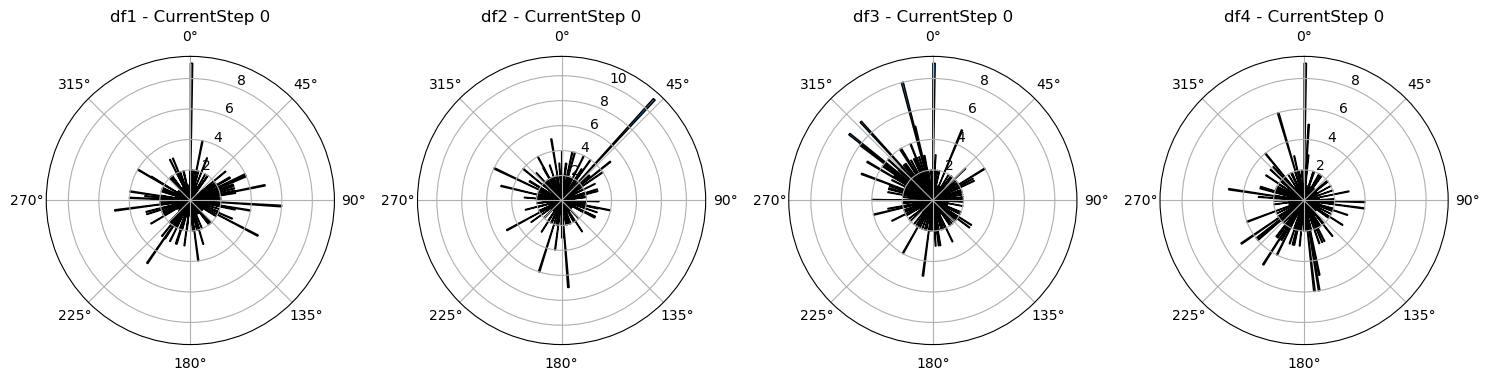

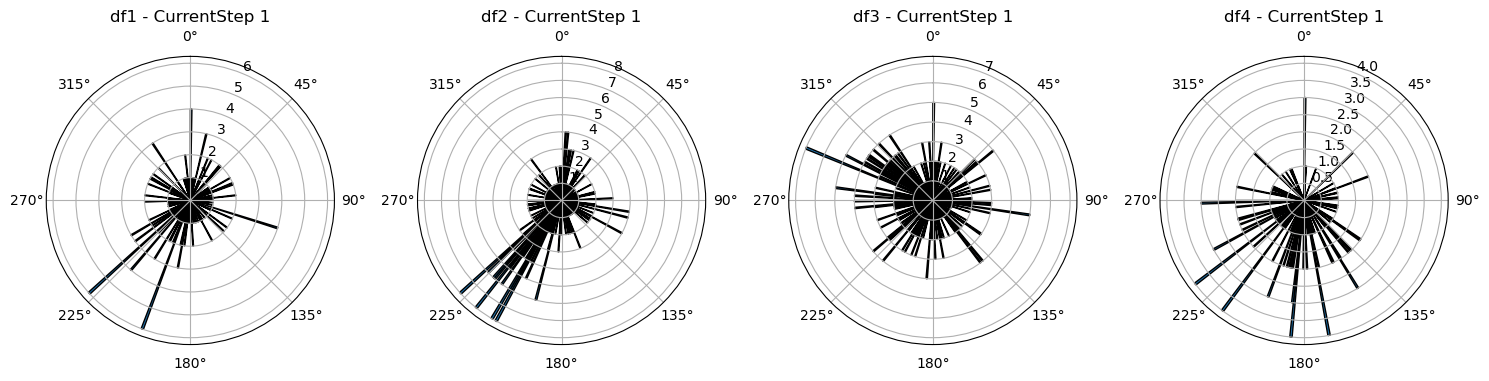

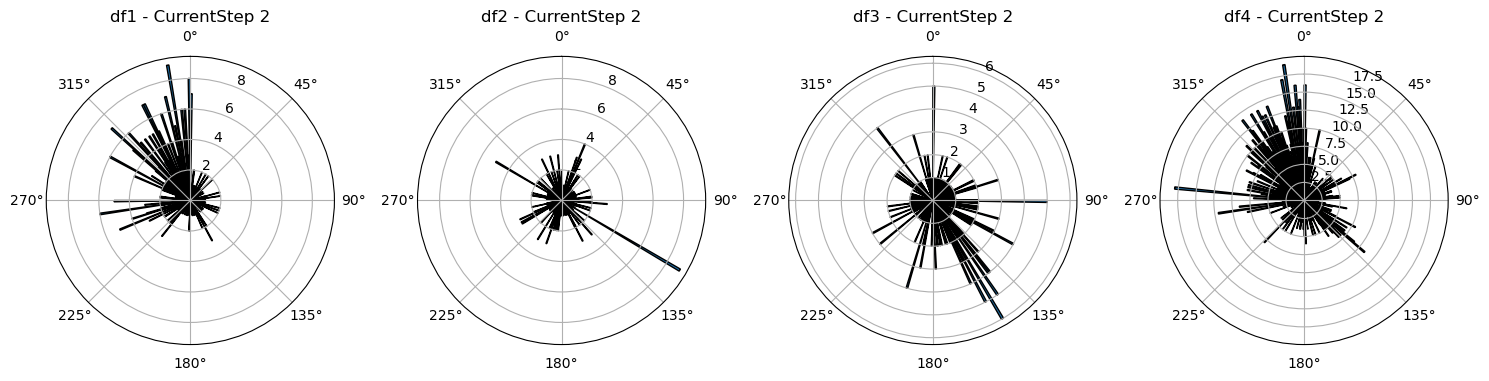

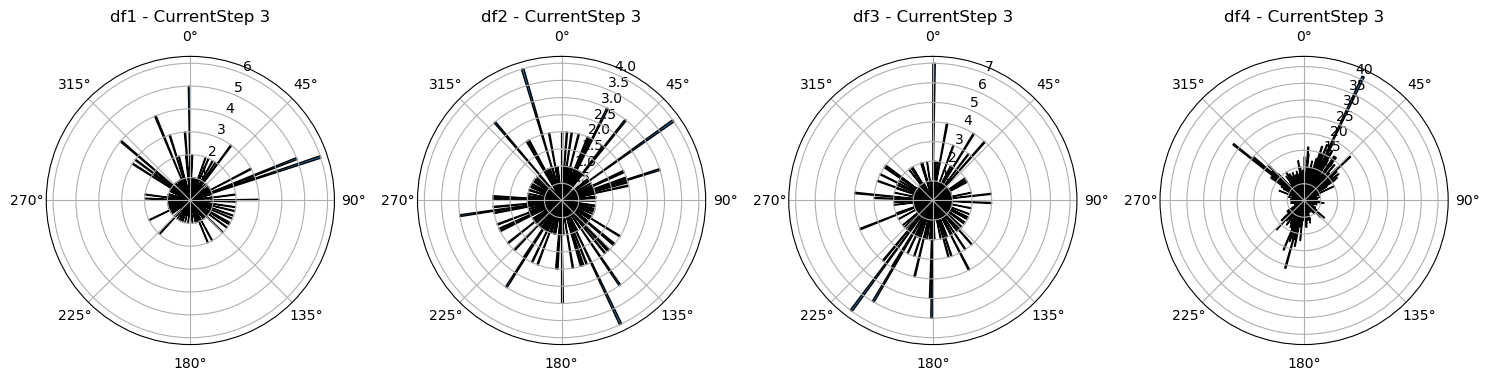

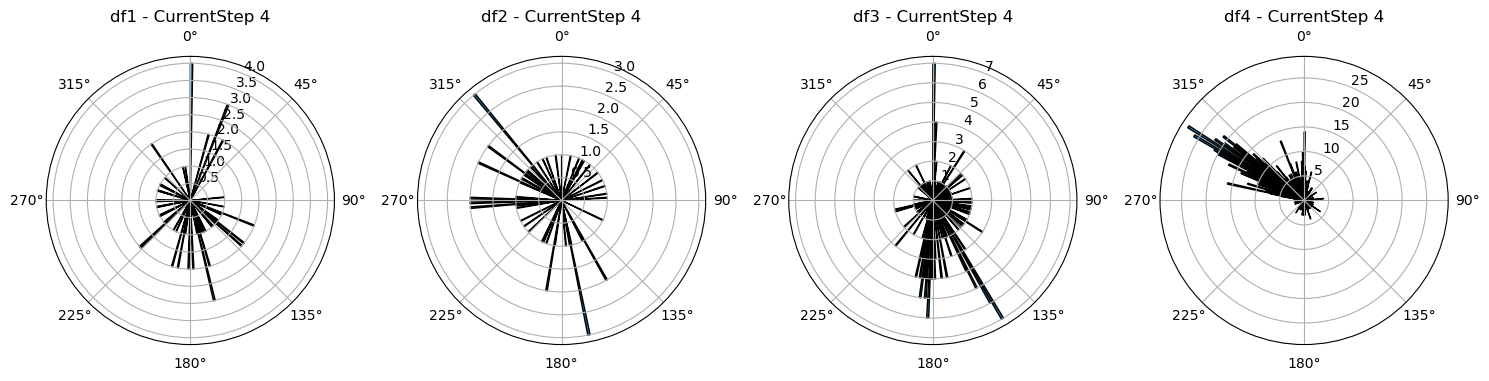

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df1, df2, df3, and df4 are already loaded

# Add a column to each DataFrame to identify its source
df1['source'] = 'df1'
df2['source'] = 'df2'
df3['source'] = 'df3'
df4['source'] = 'df4'


# Combine all DataFrames into one
combined_df = pd.concat([df1, df2, df3, df4])

# Function to plot polar histograms for each DataFrame side by side
def plot_combined_polar_histograms(combined_df, step):
    # Filter the DataFrame for the given scene value
    filtered_df = combined_df[combined_df['CurrentStep'] == step]
    
    # Get the unique sources
    sources = filtered_df['source'].unique()

    # Number of bins for the histogram
    num_bins = 360

    # Create a figure with subplots
    fig, axes = plt.subplots(1, len(sources), subplot_kw=dict(polar=True), figsize=(15, 6))

    for ax, source in zip(axes, sources):
        # Filter by source
        source_df = filtered_df[filtered_df['source'] == source]

        # Extract the GameObjectRotX values
        rot_x_values = source_df['GameObjectRotY']

        # Compute histogram
        counts, bin_edges = np.histogram(rot_x_values, bins=num_bins, range=(0, 2*np.pi))
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # Plot the histogram
        ax.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], edgecolor='k')
        ax.set_title(f'{source} - CurrentStep {step}')
        ax.set_theta_zero_location('N')
        ax.set_theta_direction(-1)


    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Example usage for a specific scene value
steps = combined_df['CurrentStep'].unique()
for scene in steps:
    plot_combined_polar_histograms(combined_df, scene)
